In [1]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
from skimage.morphology import erosion, square, binary_erosion

from glob import glob

import matplotlib.pyplot as plt
from IPython.display import display

<class 'numpy.ndarray'>
(474, 526)
(16, 3)
(73, 3)
(34, 3)


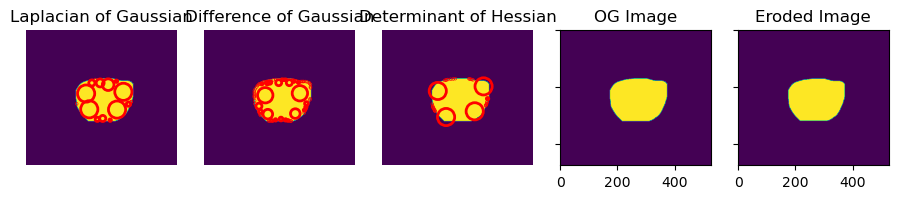

In [2]:
# image = data.hubble_deep_field()[0:500, 0:500]
image = io.imread('../Datasets/Dataset_BUSI_with_GT/benign/benign (36)_mask.png')
print(type(image))
# image = data.coins()[50:-50, 50:-50]
image_gray = rgb2gray(image) if len(image.shape) == 3 else image
# image_gray = image
print(image_gray.shape)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=0.1)
print(blobs_log.shape)

# Compute radii in the 3rd column.
# blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
blobs_log[:, 2] = blobs_log[:, 2]

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=0.1)
print(blobs_dog.shape)
# blobs_dog[:, 2] = blobs_dog[:, 2]

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.01)
print(blobs_doh.shape)
# print(blobs_doh[:,0])
# print(blobs_doh[:,1])
# print(blobs_doh[:,2])

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['red', 'red', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 5, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

nidx = idx+1
ax[nidx].set_title("OG Image")
e_image = erosion(image)
ax[nidx].imshow(image)
nidx += 1
ax[nidx].set_title("Eroded Image")
ax[nidx].imshow(e_image)

plt.tight_layout()
plt.show()

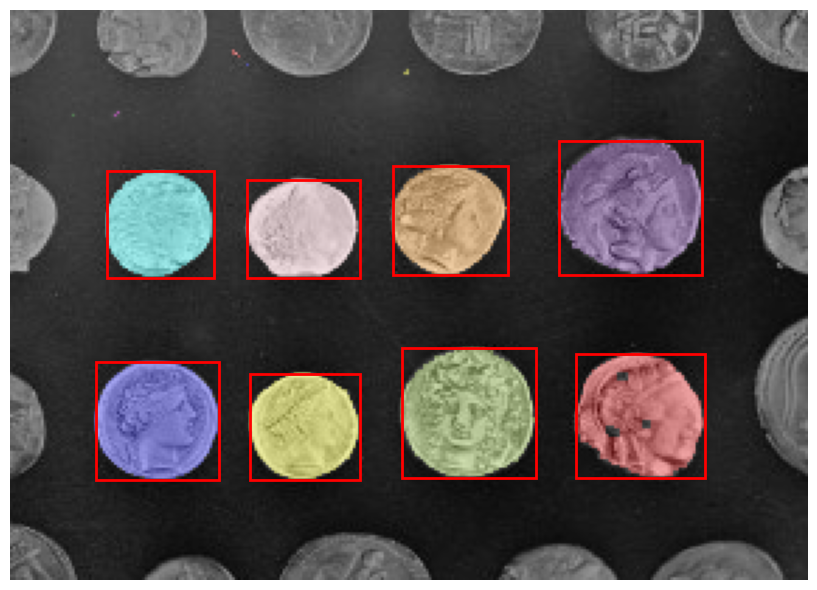

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))



# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
# ax.imshow(bw)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle(
            (minc, minr),
            maxc - minc,
            maxr - minr,
            fill=False,
            edgecolor='red',
            linewidth=2,
        )
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

In [5]:
x = np.zeros((10,10))

In [6]:
a, b, r = 4, 6, 3

In [7]:
y = x

In [8]:
y[(a-r+1):(a+r),(b-r+1):(b+r)] = 1

In [9]:
len(y.shape)

2

In [10]:
import torch

In [11]:
yt = torch.tensor(y)
print(yt)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)


In [12]:
import os
fnames = os.listdir('../Datasets/Dataset_BUSI_with_GT/benign/')
for fname in fnames:
#     print(fname)
    x = fname.split('_')
    if len(x) > 2:
        print(x)
        print(x[2].split('.')[0])

['benign (100)', 'mask', '1.png']
1
['benign (163)', 'mask', '1.png']
1
['benign (173)', 'mask', '1.png']
1
['benign (181)', 'mask', '1.png']
1
['benign (195)', 'mask', '1.png']
1
['benign (195)', 'mask', '2.png']
2
['benign (25)', 'mask', '1.png']
1
['benign (315)', 'mask', '1.png']
1
['benign (346)', 'mask', '1.png']
1
['benign (4)', 'mask', '1.png']
1
['benign (424)', 'mask', '1.png']
1
['benign (54)', 'mask', '1.png']
1
['benign (58)', 'mask', '1.png']
1
['benign (83)', 'mask', '1.png']
1
['benign (92)', 'mask', '1.png']
1
['benign (93)', 'mask', '1.png']
1
['benign (98)', 'mask', '1.png']
1


### 

###

### Description of code

Open a file. Load related mask files. Erode them individually until less than 50 and more than 20 pixels remain in the foreground. Note the co-ordinates of the eroded mask (like a bounding box). Use this as the weak mask to compute BCE Loss against. Compute BCE loss ONLY on this bounding box - training will happen only for the positive class

In [13]:
# image = io.imread('../Datasets/Dataset_BUSI_with_GT/benign/benign (36)_mask.png')

In [14]:
im_name = 'benign (100).png'
image = io.imread('../Datasets/Dataset_BUSI_with_GT/benign/' + im_name)

In [15]:
def get_masks(im_name):
    
    imn = im_name.split('.')[0]
    mask_names = glob('../Datasets/Dataset_BUSI_with_GT/benign/' + imn + '_mask' + '*')
    
    return mask_names
    

In [16]:
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.imshow(image)

In [17]:
# def eroded_mask(mask):
    
#     o_pixels = np.sum(mask)
#     e_mask = mask
#     pixels = np.sum(e_mask)
#     while pixels >= 50:
        
# #         e_mask = binary_erosion(e_mask, square(3))
#         e_mask = erosion(e_mask, np.ones((3,3)))
#         pixels = np.sum(e_mask)
        
#     print(pixels)
    
#     return e_mask

In [18]:
def eroded_mask(mask):
    
    o_pixels = np.sum(mask)
    e_mask = mask
    pixels = np.sum(e_mask)
    while pixels >= 50:
        
#         e_mask = binary_erosion(e_mask, square(3))
        e_mask_t = erosion(e_mask, np.ones((3,3)))
        pixels = np.sum(e_mask_t)
        
        if pixels != 0:
            e_mask = e_mask_t
        
    print(pixels)
    
    return e_mask

In [19]:
mask_names = get_masks(im_name)
print(mask_names)
print(image.shape[:2])
mask = np.zeros(image.shape[:2])
mask_og = np.zeros(image.shape[:2])
masks_og = list()

for f in mask_names:
    
    mask_f = io.imread(f)
    masks_og.append(mask_f)
    ##do erosion
    
    e_mask = eroded_mask(mask_f)
    mask_og += mask_f
    mask += e_mask

['../Datasets/Dataset_BUSI_with_GT/benign/benign (100)_mask.png', '../Datasets/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png']
(473, 323)
35
34


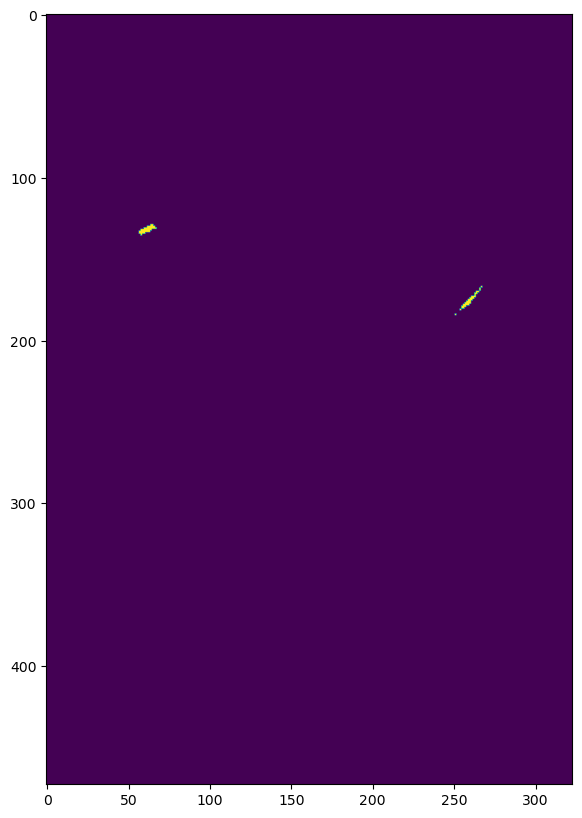

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)

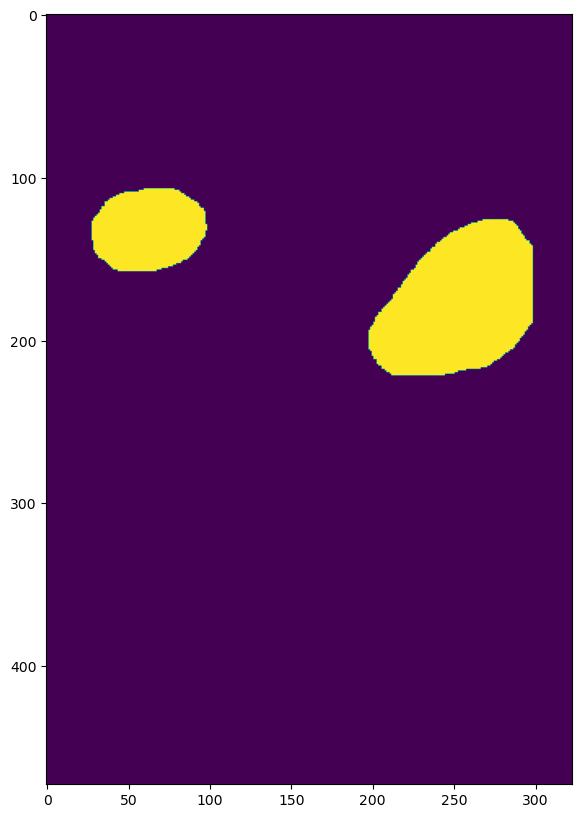

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask_og)
# ax.imshow(square(3))

In [22]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [23]:
square(3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)